In [13]:
from tensorflow import keras
# from tensorflow.keras import XXX
from keras.datasets import mnist

In [14]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [15]:
print(len(train_labels))

60000


(28, 28)


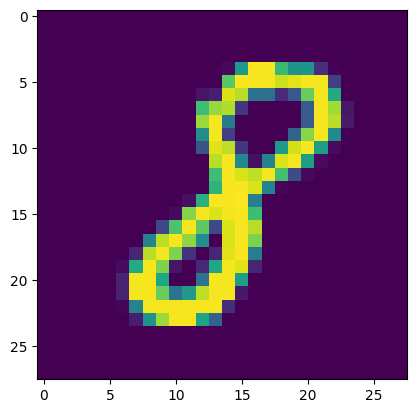

In [16]:
import matplotlib.pyplot as plt
print(test_images[1].shape)
plt.imshow(train_images[343])
plt.show()

Network architecture

In [17]:
from keras import models
from keras import layers
 
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

d:\Python\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [19]:
import numpy as np
train_images = np.float32(np.reshape(train_images, (60000, 28*28)))/255
test_images = np.float32(np.reshape(test_images, (10000, 28*28)))/255

In [20]:
from keras.utils import to_categorical
 
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [21]:
network.fit(train_images, train_labels, batch_size=128, epochs=5)

Epoch 1/5


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8736 - loss: 0.4459
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9672 - loss: 0.1152
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9798 - loss: 0.0720
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9854 - loss: 0.0506
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9895 - loss: 0.0358


In [22]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
 
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9740 - loss: 0.0840
test_acc: 0.9785000085830688
